In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import datetime

ContraCosta_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/CO/2020.csv'])
, ignore_index=True)

In [ ]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg

In [ ]:
ContraCosta_CO_full = calculate_daily_average(ContraCosta_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [ ]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [ ]:
missing_dates = find_missing_dates(ContraCosta_CO_full, 'Date')

In [ ]:
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [ ]:
ContraCosta_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/NO2/2020.csv'])
, ignore_index=True)

In [ ]:
ContraCosta_NO2_full = calculate_daily_average(ContraCosta_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(ContraCosta_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [ ]:
ContraCosta_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/Ozone/2020.csv'])
, ignore_index=True)

In [ ]:
ContraCosta_Ozone_full = calculate_daily_average(ContraCosta_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(ContraCosta_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [ ]:
ContraCosta_Ozone_full = process_data(ContraCosta_Ozone_full, 'Date', missing_dates)

In [ ]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
ContraCosta_Ozone_full.loc[len(ContraCosta_Ozone_full)] = new_entry

In [ ]:
ContraCosta_Ozone_full.reset_index(drop=True, inplace=True)

In [ ]:
ContraCosta_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM2.5/2020.csv'])
, ignore_index=True)

In [ ]:
ContraCosta_PM2_full = calculate_daily_average(ContraCosta_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(ContraCosta_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2016-10-14', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
ContraCosta_PM2_full = process_data(ContraCosta_PM2_full, 'Date', missing_dates)

In [ ]:
ContraCosta_PM10_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM10/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM10/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM10/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM10/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM10/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/PM10/2020.csv'])
, ignore_index=True)

In [ ]:
ContraCosta_PM10_full = calculate_daily_average(ContraCosta_PM10_full, 'Date', 'Daily Mean PM10 Concentration')
missing_dates = find_missing_dates(ContraCosta_PM10_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-01-16', '2015-01-17',
               ...
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28'],
              dtype='datetime64[ns]', length=1821, freq=None)


In [ ]:
ContraCosta_PM10_full = process_data(ContraCosta_PM10_full, 'Date', missing_dates)

In [ ]:
ContraCosta_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Contra-Costa/SO2/2020.csv'])
, ignore_index=True)

In [ ]:
ContraCosta_SO2_full = calculate_daily_average(ContraCosta_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(ContraCosta_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [ ]:
ContraCosta_CO_full.rename(columns = {'index':'Date'}, inplace = True)
ContraCosta_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
ContraCosta_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
ContraCosta_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
ContraCosta_PM10_full.rename(columns = {'index':'Date'}, inplace = True)
ContraCosta_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [ ]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [ContraCosta_CO_full,ContraCosta_NO2_full,ContraCosta_Ozone_full,ContraCosta_PM2_full,ContraCosta_PM10_full,ContraCosta_SO2_full])

In [ ]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Mean PM10 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,0.533333,24.400000,0.027500,20.15,NaN,1.550000
1,2015-01-02,0.600000,28.500000,0.026000,22.25,NaN,2.620000
2,2015-01-03,0.666667,30.233333,0.020500,27.85,NaN,3.020000
3,2015-01-04,0.666667,26.200000,0.029333,29.75,NaN,2.360000
4,2015-01-05,0.633333,29.633333,0.025000,22.70,NaN,2.833333


In [ ]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                          'Daily Mean PM10 Concentration': 'PM10', 'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [ ]:
combine

,Date,CO,NO2,Ozone,PM2.5,PM10,SO2
0,2015-01-01,0.533333,24.400000,0.027500,20.150000,NaN,1.550000
1,2015-01-02,0.600000,28.500000,0.026000,22.250000,NaN,2.620000
2,2015-01-03,0.666667,30.233333,0.020500,27.850000,NaN,3.020000
3,2015-01-04,0.666667,26.200000,0.029333,29.750000,NaN,2.360000
4,2015-01-05,0.633333,29.633333,0.025000,22.700000,NaN,2.833333
...,...,...,...,...,...,...,...
2187,2020-12-27,0.700000,14.475000,0.026000,5.000000,0.0,1.900000
2188,2020-12-28,0.620000,19.450000,0.031250,7.300000,0.0,1.233333
2189,2020-12-29,0.760000,23.450000,0.024250,5.633333,13.0,2.333333
2190,2020-12-30,0.860000,19.250000,0.025500,5.550000,NaN,1.650000


In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone       PM2.5         PM10  \
count  2192.000000  2192.000000  2192.000000  2192.00000  2185.000000   
mean      0.448269    13.340363     0.035672     9.72941     2.862243   
std       0.178133     6.906207     0.009237    10.21588     8.867865   
min       0.100000     1.850000     0.000000     0.00000     0.000000   
25%       0.333333     7.425000     0.030333     5.60000     0.000000   
50%       0.400000    12.375000     0.035750     7.80000     0.000000   
75%       0.533333    18.475000     0.041000    10.85000     0.000000   
max       1.700000    40.125000     0.074250   187.70000   190.500000   

               SO2  
count  2192.000000  
mean      2.254268  
std       1.262325  
min       0.400000  
25%       1.483333  
50%       2.026667  
75%       2.742500  
max      34.483333  


In [ ]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Riverside',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [ ]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [ ]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date        CO        NO2     Ozone  PM2.5  PM10       SO2  AQI  \
0 2015-01-01  0.533333  24.400000  0.027500  20.15   NaN  1.550000  100   
1 2015-01-02  0.600000  28.500000  0.026000  22.25   NaN  2.620000  100   
2 2015-01-03  0.666667  30.233333  0.020500  27.85   NaN  3.020000  100   
3 2015-01-04  0.666667  26.200000  0.029333  29.75   NaN  2.360000  100   
4 2015-01-05  0.633333  29.633333  0.025000  22.70   NaN  2.833333  100   

  AQI Category  
0     Moderate  
1     Moderate  
2     Moderate  
3     Moderate  
4     Moderate  


In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of Contra-Costa from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Contra-Costa",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in Contra-Costa")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in Contra-Costa")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in Contra-Costa")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 2s 13ms/step - loss: 0.0139 - val_loss: 0.0132
Epoch 2/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 0.0116
Epoch 3/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0085 - val_loss: 0.0111
Epoch 4/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0086 - val_loss: 0.0110
Epoch 5/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0084 - val_loss: 0.0108
Epoch 6/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0107
Epoch 7/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0105
Epoch 8/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0105
Epoch 9/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0103
Epoch 10/50
44/44 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0101
Epoch 11/50
44/44 

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 3ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 502.1940440560276


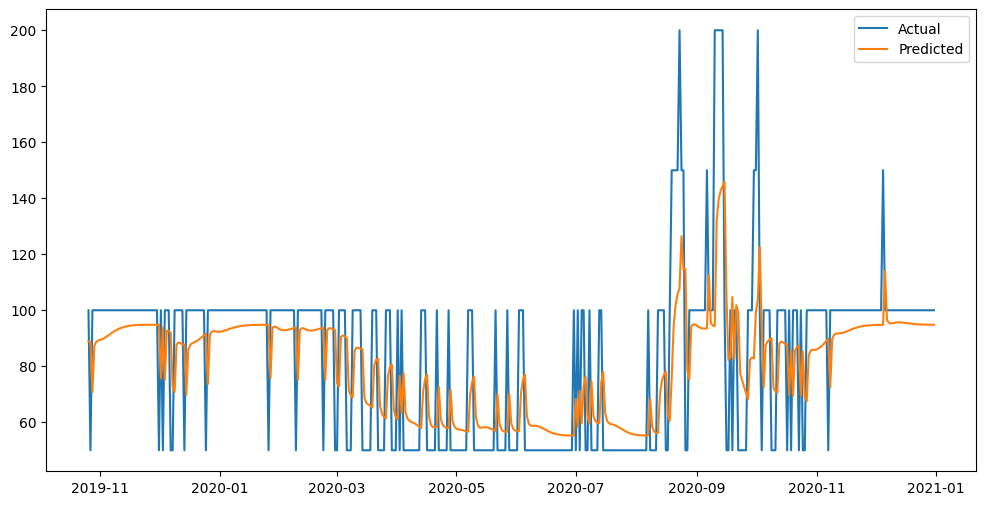

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 1s 12ms/step - loss: 0.0117 - val_loss: 0.0067
Epoch 2/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0060
Epoch 3/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0058
Epoch 4/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 5/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 6/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 7/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 8/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 9/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 10/20
44/44 [==============================] - 0s 10ms/step - loss: 0.0030 - val_loss: 0.0044
Epoch 11/20
44/44

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 0s 3ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.01914621388022021


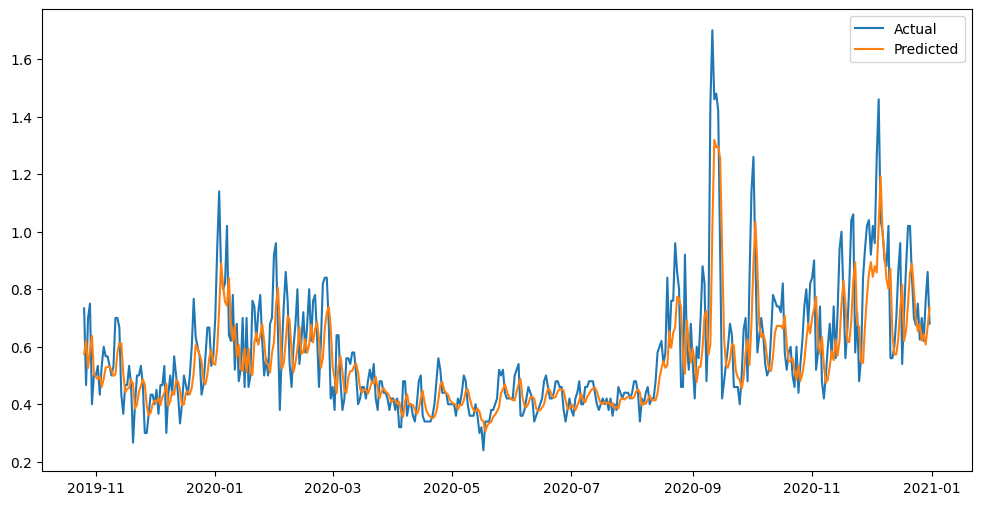

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('Contra-Costa-CO.keras')

In [ ]:
model.save('Contra-Costa-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 2/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 3/20
44/44 [==============================] - 0s 9ms/step - loss: 9.5733e-04 - val_loss: 0.0047
Epoch 4/20
44/44 [==============================] - 0s 9ms/step - loss: 9.0938e-04 - val_loss: 0.0045
Epoch 5/20
44/44 [==============================] - 0s 9ms/step - loss: 8.8599e-04 - val_loss: 0.0042
Epoch 6/20
44/44 [==============================] - 0s 9ms/step - loss: 8.4045e-04 - val_loss: 0.0041
Epoch 7/20
44/44 [==============================] - 0s 8ms/step - loss: 8.3652e-04 - val_loss: 0.0039
Epoch 8/20
44/44 [==============================] - 0s 9ms/step - loss: 7.9834e-04 - val_loss: 0.0038
Epoch 9/20
44/44 [==============================] - 0s 9ms/step - loss: 7.8500e-04 - val_loss: 0.0036
Epoch 10/20
44/44 [==============================] - 1s 12ms/step - loss: 7.8089e-04 - va

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 82.82066648032065


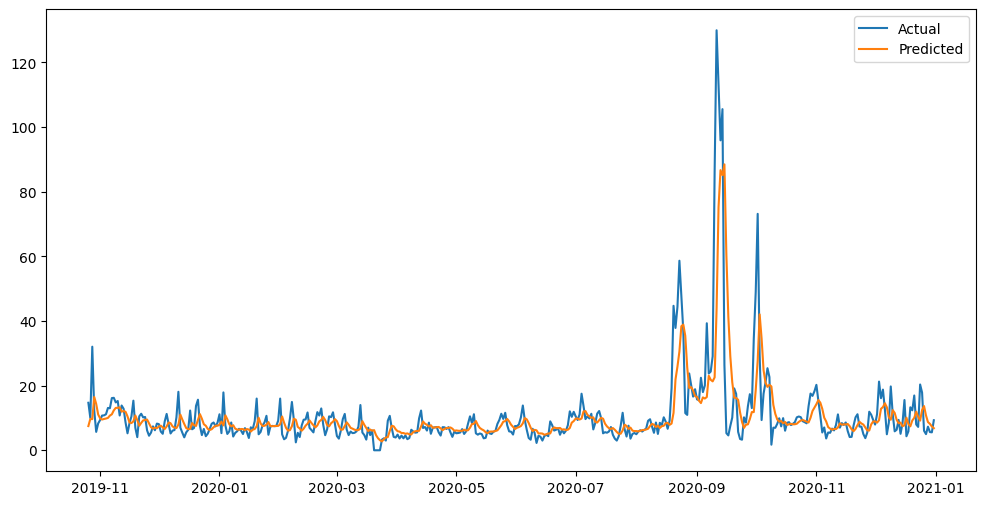

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('Contra-Costa-PM2.5.keras')